In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# from lmfit import Model
# from scipy.stats import linregress

,Time (s),Potential vs Ag/AgCl (V),Current (A),Scan,Current Density (A/cm$^2$)
0,9.486165,0.207886,2.593994e-07,1,1.467900e-07
1,9.730306,0.205414,-6.408691e-08,1,-3.626577e-08
2,9.974447,0.203003,-2.716064e-07,1,-1.536978e-07
3,10.218588,0.200562,-4.608154e-07,1,-2.607682e-07
4,10.462729,0.198151,-1.676331e-06,1,-9.486091e-07
...,...,...,...,...,...
7064,1734.098185,0.222473,3.285217e-05,4,1.859053e-05
7065,1734.342326,0.224884,3.302307e-05,4,1.868724e-05
7066,1734.586467,0.227295,3.318176e-05,4,1.877704e-05
7067,1734.830608,0.229797,3.335266e-05,4,1.887375e-05


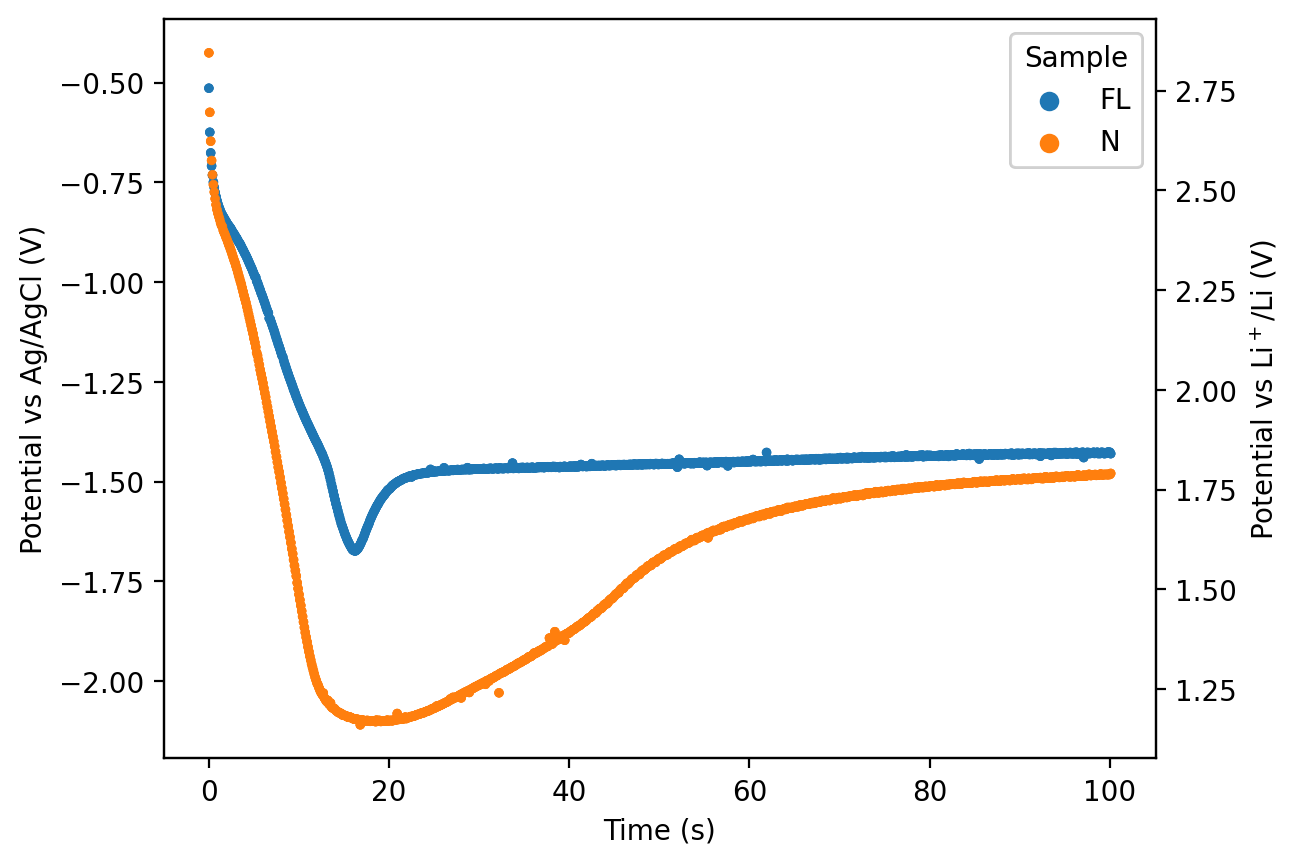

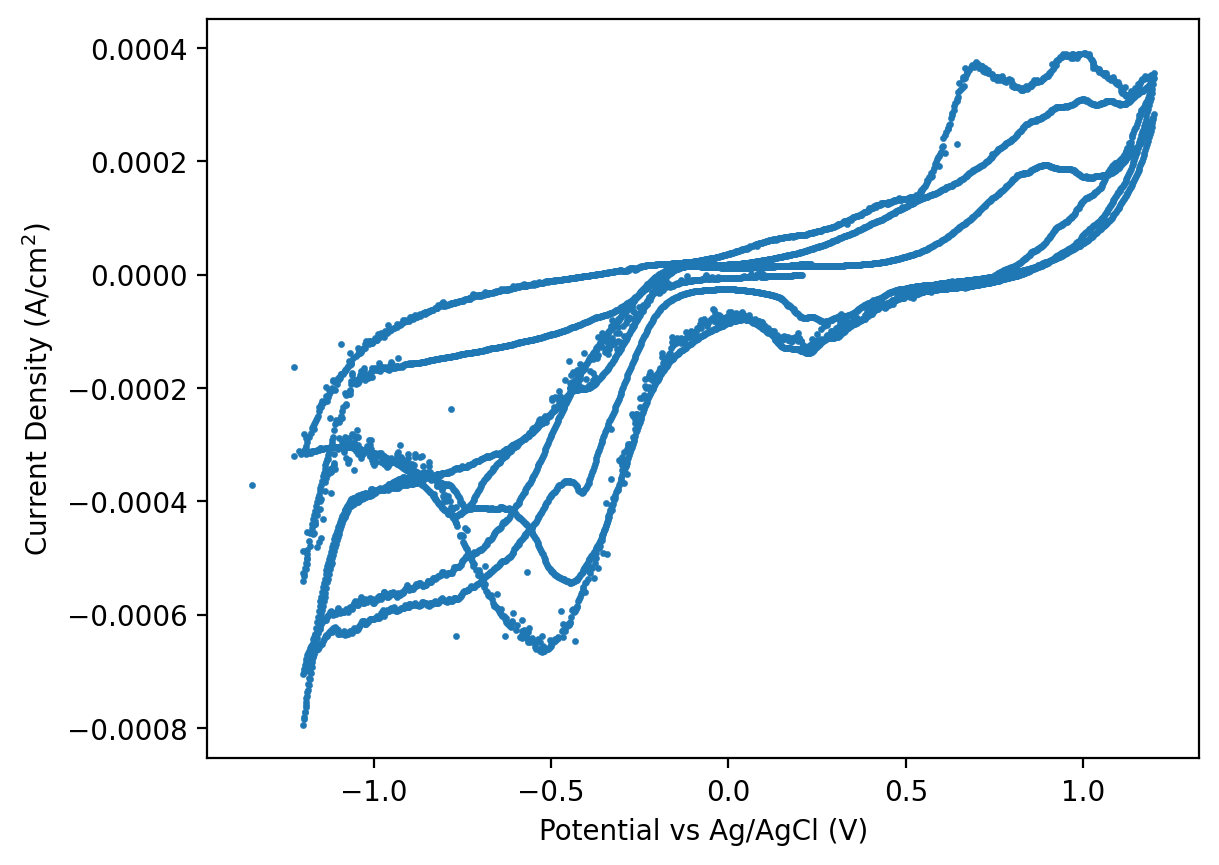

In [7]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Galvanostatic Deposition\Mimic round4'
files = [os.path.join(path, i) for i in os.listdir(path)]
col = ['Time (s)', 'Potential vs Ag/AgCl (V)', 'Current (A)', 'Potential vs Li$^+$/Li (V)', 'Current Density (A/cm$^2$)' ]
sample_names = ['FL', 'N']
area = np.pi * 0.75**2
gd = pd.DataFrame()
for i in files:
    if 'woLi.txt' in i:
        df = pd.read_csv(i, sep = '\t')
        df = df.rename(columns={'Corrected time (s)' : col[0],
                                'WE(1).Potential (V)' : col[1],
                                'WE(1).Current (A)' : col[2]})
        
        df[col[3]] = df[col[1]] + 3.05 + 0.22
        
        if 'FL_01_woLi.txt' in i:
            sample = sample_names[0]
        else:
            sample = sample_names[1]
        
        df['Sample'] = sample
        
        gd = pd.concat([gd, df], ignore_index=True)
        
    else:
        cv_df = pd.read_csv(i, sep = '\t')
        cv_df = cv_df.rename(columns={'WE(1).Potential (V)' : col[1],
                                'WE(1).Current (A)' : col[2]})
        cv_df[col[4]] = cv_df[col[2]] / area
        
fig, ax = plt.subplots(dpi = 200)
ax2 = ax.twinx()
sns.scatterplot(data = gd, x = col[0], y = col[1], edgecolor = None, s = 10, ax = ax, hue = 'Sample')
sns.scatterplot(data = gd, x = col[0], y = col[3], edgecolor = None, s = 10, ax = ax2, hue = 'Sample')

fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = cv_df, x = col[1], y = col[4], edgecolor = None, s = 5)
cv_df